# Line detection

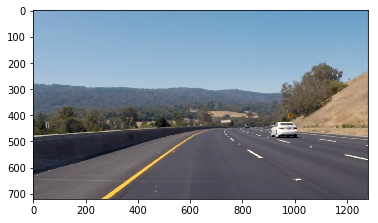

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
%matplotlib inline

WHITE = (255,255,255)
GREEN = (0,255,0)
RED = (255,0,0)

# Read in the image
image = cv2.imread('images/curved_lane.jpg')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

### Perform edge detection

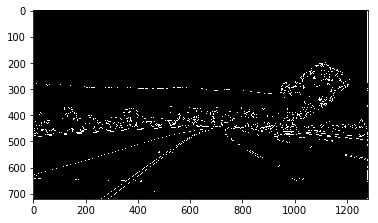

In [2]:
# Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Define our parameters for Canny
low_threshold = 50
high_threshold = 100
edges = cv2.Canny(gray, low_threshold, high_threshold)

plt.imshow(edges, cmap='gray')

### Find lines using a Hough transform

Image size(1280,720)


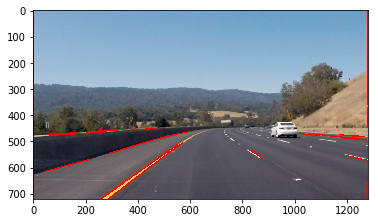

In [3]:
# Define parameters for Hough transform
rho = 1
theta = np.pi/180
threshold = 60
min_line_length = 50
max_line_gap = 5

line_image = np.copy(image)

lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                        min_line_length, max_line_gap)


# draw lines on image
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),RED,3)

w,h,_ = line_image.shape
print("Image size({},{})".format(h,w))
plt.imshow(line_image)

## Create a shape
 

True

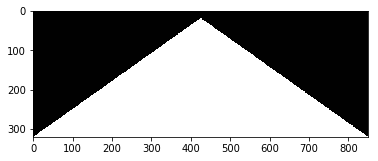

In [4]:
image = np.ones((320, 850, 3), np.uint8)

# Since it's a road the ideal shape is a triangle
top = (425, 20)
btm_L = (0, 320)
btm_R = (850, 320)

triangle = np.array([top, btm_L, btm_R])
cv2.drawContours(image, [triangle], 0, WHITE, -1)

plt.imshow(image)
cv2.imwrite('images/triangle.png',image)

## Alpha shape in the image

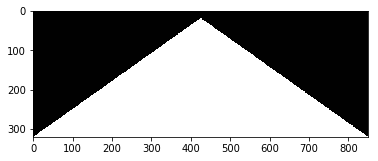

In [5]:
img = Image.open('images/triangle.png')
img = img.convert("RGBA")
data = img.getdata()
new_data = []
for item in data:
    if item[0] == 255 and item[1] == 255 and item[2] == 255:
        new_data.append((255, 255, 255, 0))
    else:
        new_data.append(item)

img.putdata(new_data)
img.save("images/alpha_triangle.png", "PNG")
plt.imshow(img)

## Center image

center
(320, 850, 3)


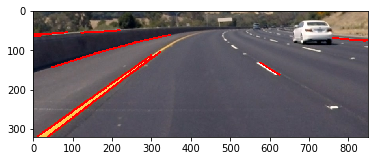

In [6]:
new_img = np.copy(line_image)
center_img = new_img[400:,250:1100]
print("center")
plt.imshow(center_img)
plt.savefig('driving_inLane.png')
print(center_img.shape)

## Add both images together

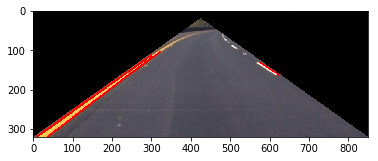

In [7]:
src1 = np.copy(center_img)
src2 = np.copy(image)
src2 = cv2.resize(src2, src1.shape[1::-1])

dst = cv2.bitwise_and(src1, src2)

cv2.imwrite('images/road_and_triangle.jpg', dst)
plt.imshow(dst)